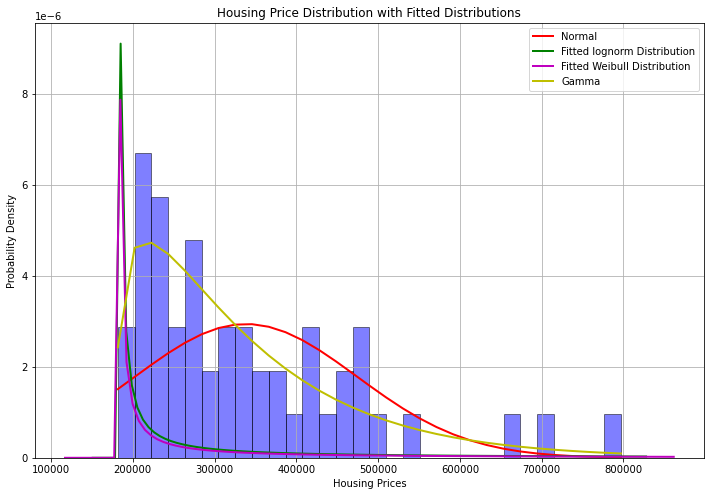

In [9]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import lognorm, weibull_min, gamma
import pandas as pd

file_path_housing = 'filtered_housing_prices.csv'
df_housing = pd.read_csv(file_path_housing)

# Assuming df_housing is already loaded and contains the housing prices data
housing_prices = df_housing['Mean of Median of housing price']

# Plot the histogram
plt.figure(figsize=(12, 8))
count, bins, ignored = plt.hist(housing_prices, bins=30, alpha=0.5, color='blue', edgecolor='black', density=True)

# Fit and plot various distributions
# Normal Distribution
norm_params = stats.norm.fit(housing_prices)
norm_dist_fitted = stats.norm(*norm_params)
plt.plot(bins, norm_dist_fitted.pdf(bins), 'r-', lw=2, label='Normal')

# # Log-Normal Distribution
# Fit the Log-Normal distribution to the data
lognorm_params = lognorm.fit(housing_prices)
lognorm_dist_fitted = lognorm(*lognorm_params[:-2], loc=lognorm_params[-2], scale=lognorm_params[-1])

# Plot the PDF of the fitted Log-Normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = lognorm_dist_fitted.pdf(x)
plt.plot(x, p, 'g-', lw=2, label='Fitted lognorm Distribution')

# Weibull Distribution
# Fit the Weibull distribution to the data
weibull_params = weibull_min.fit(housing_prices)
weibull_dist_fitted = weibull_min(*weibull_params[:-2], loc=weibull_params[-2], scale=weibull_params[-1])

# Plot the PDF of the fitted Weibull distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = weibull_dist_fitted.pdf(x)
plt.plot(x, p, 'm-', lw=2, label='Fitted Weibull Distribution')

# Gamma Distribution
gamma_params = gamma.fit(housing_prices)
gamma_dist_fitted = gamma(*gamma_params[:-2], loc=gamma_params[-2], scale=gamma_params[-1])
plt.plot(bins, gamma_dist_fitted.pdf(bins), 'y-', lw=2, label='Gamma')

# Annotate plot
plt.title('Housing Price Distribution with Fitted Distributions')
plt.xlabel('Housing Prices')
plt.ylabel('Probability Density')
plt.legend(loc='upper right')
plt.grid(True)

# Show the plot
plt.show()

# Compute goodness-of-fit metrics
# Kolmogorov-Smirnov test for each distribution
ks_norm = stats.kstest(housing_prices, norm_dist_fitted.cdf)
ks_lognorm = stats.kstest(housing_prices, lognorm_dist_fitted.cdf)
ks_weibull = stats.kstest(housing_prices, weibull_dist_fitted.cdf)
ks_gamma = stats.kstest(housing_prices, gamma_dist_fitted.cdf)

# Print out the goodness-of-fit test results
ks_results = {
    'Normal': ks_norm,
    'Log-Normal': ks_lognorm,
    'Weibull': ks_weibull,
    'Gamma': ks_gamma
}

# print(ks_results)


In [8]:
ks_results_df = pd.DataFrame(ks_results).transpose()
ks_results_df.columns = ['KS Statistic', 'P-value']
ks_results_df

,KS Statistic,P-value
Normal,0.132280,3.064747e-01
Log-Normal,0.787505,3.537118e-34
Weibull,0.839775,7.905226e-41
Gamma,0.071431,9.404938e-01


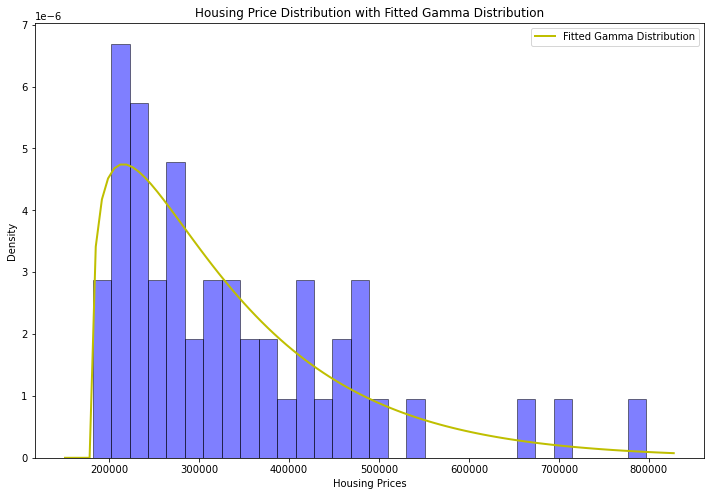

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Load the housing prices data
housing_path = 'filtered_housing_prices.csv'
df_housing = pd.read_csv(housing_path)

# Extract the housing prices data
housing_prices = df_housing['Mean of Median of housing price']

# Fit the Gamma distribution to the data
gamma_params = gamma.fit(housing_prices)
gamma_dist_fitted = gamma(*gamma_params[:-2], loc=gamma_params[-2], scale=gamma_params[-1])

# Plot the histogram of the housing prices
plt.figure(figsize=(12, 8))
count, bins, ignored = plt.hist(housing_prices, bins=30, alpha=0.5, color='blue', edgecolor='black', density=True)

# Plot the PDF of the fitted Gamma distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = gamma_dist_fitted.pdf(x)
plt.plot(x, p, 'y-', lw=2, label='Fitted Gamma Distribution')

# Add labels and title
plt.xlabel('Housing Prices')
plt.ylabel('Density')
plt.title('Housing Price Distribution with Fitted Gamma Distribution')
plt.legend()

# Show the plot
plt.show()


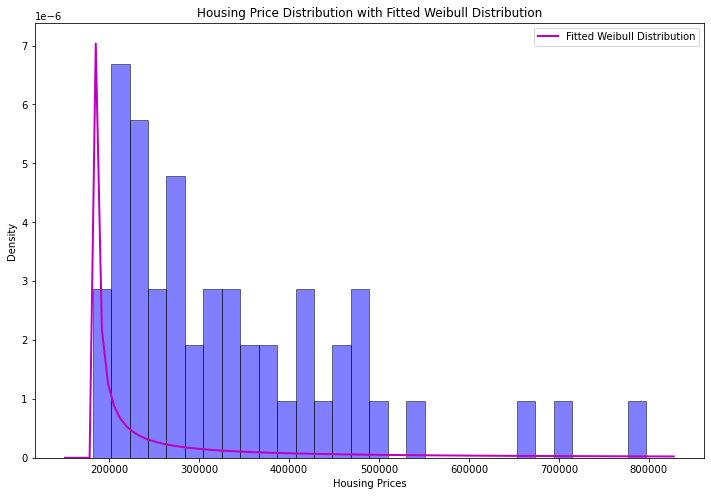

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Load the housing prices data
housing_path = 'filtered_housing_prices.csv'
df_housing = pd.read_csv(housing_path)

# Extract the housing prices data
housing_prices = df_housing['Mean of Median of housing price']

# Fit the Weibull distribution to the data
weibull_params = weibull_min.fit(housing_prices)
weibull_dist_fitted = weibull_min(*weibull_params[:-2], loc=weibull_params[-2], scale=weibull_params[-1])

# Plot the histogram of the housing prices
plt.figure(figsize=(12, 8))
count, bins, ignored = plt.hist(housing_prices, bins=30, alpha=0.5, color='blue', edgecolor='black', density=True)

# Plot the PDF of the fitted Weibull distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = weibull_dist_fitted.pdf(x)
plt.plot(x, p, 'm-', lw=2, label='Fitted Weibull Distribution')

# Add labels and title
plt.xlabel('Housing Prices')
plt.ylabel('Density')
plt.title('Housing Price Distribution with Fitted Weibull Distribution')
plt.legend()

# Show the plot
plt.show()
